<a href="https://colab.research.google.com/github/vishwashrisairam/AI-Workshop/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step1 : importing packages and data

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
mnist=input_data.read_data_sets("MNIST_data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [8]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [9]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
mnist.train.num_examples

55000

In [11]:
mnist.test.num_examples

10000

In [12]:
mnist.validation.num_examplesm

5000

#Step 2 : Visualizing Data 

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
mnist.train.images.shape

(55000, 784)

In [17]:
mnist.train.images[500]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

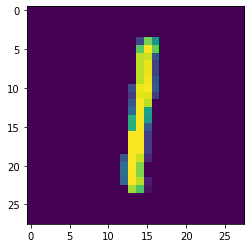

In [22]:
my_img=mnist.train.images[500].reshape(28,28)
plt.imshow(my_img)

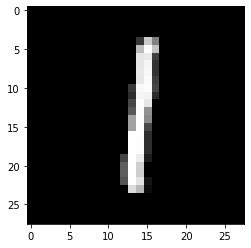

In [21]:
plt.imshow(my_img,cmap='gist_gray')

In [26]:
my_img.min()

0.0

In [27]:
my_img.max()

1.0

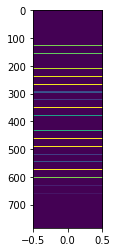

In [31]:
my_img2=mnist.train.images[500].reshape(784,1)
plt.imshow(my_img2,aspect=0.004)

## Step 3: Building NN Model

1. Placeholders
2. Variables
3. Create computation graph
4. Loss functions 
5. Optimizer 
6. Create and run the session 

In [0]:
x=tf.placeholder(tf.float32,shape=[None,784])

In [0]:
#Weights and bias 
W= tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

In [0]:
# create computation graph
y=tf.matmul(x,W)+b

In [0]:
y_true=tf.placeholder(tf.float32,shape=[None,10])

In [0]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))

In [0]:
optimizer= tf.train.AdamOptimizer(learning_rate=0.0001)

In [0]:
train=optimizer.minimize(cross_entropy)

In [0]:
init=tf.global_variables_initializer()

In [61]:
# Create and run the session 
with tf.Session() as sess:
  sess.run(init)

  #Train 100000
  for step in range(100000):
    batch_x,batch_y= mnist.train.next_batch(256)
    sess.run(train,feed_dict={x:batch_x,y_true:batch_y})

    #Evaluate the test/train model 
  matches= tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
  accuracy= tf.reduce_mean(tf.cast(matches,tf.float32))

  print(sess.run(accuracy, feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

# print("Epoch: {} cost={: .4f}".format(epoch+1,avg_cost))
# print("Model has completed {} Epochs of trainging".format(training_epochs))

0.9285
